### 1. Business Understanding 

**Latar Belakang**

Apartemen dapat menjadi salah satu solusi atas kebutuhan hunian masyarakat di perkotaan karena adanya keterbatasan lahan dan aktivitas yang semakin padat. Para pemilik apartemen sering kali dihadapkan kepada tantangan untuk menentukan harga yang sesuai dengan kondisi pasar. Penentuan harga yang tidak tepat dapat menyebabkan kesulitan dalam menjual unit apartemen atau potensi kerugian jika harga terlalu rendah. Oleh karena itu, model prediksi harga apartemen yang mempertimbangkan berbagai faktor internal dan eksternal seperti ukuran, akses ke transportasi umum, dan fasilitas di sekitar menjadi sangat penting untuk memaksimalkan penjualan dan keuntungan.

**Permasalahan Bisnis**

Permasalahan bisnis yang ingin dipecahkan adalah kesulitan dalam menentukan harga jual apartemen yang sesuai dengan kondisi pasar. Saat ini, pemilik apartemen mungkin menentukan harga berdasarkan informasi yang terbatas. Harga yang dipasang bisa terlalu tinggi sehingga dapat mengakibatkan lambatnya penjualan atau terlalu rendah sehingga mengakibatkan kerugian finansial. 

**Tujuan**

Berdasarkan permasalahan bisnis tersebut, dapat dikembangkan sebuah model regresi yang dapat memprediksi harga apartemen yang lebih sesuai. Dengan model ini, pemilik apartemen dapat menetapkan harga yang sesuai berdasarkan berbagai faktor seperti ukuran apartemen, tahun dibangun, akses ke fasilitas umum, dan jarak ke transportasi umum. Dengan model ini, pemilik apartemen bisa menetapkan harga yang lebih sesuai dengan kondisi pasar.

**Analytic Approach**

Pendekatan analitik yang digunakan adalah regresi yang bertujuan untuk melakukan prediksi harga jual berdasarkan fitur-fitur yang ada. Fitur-fitur yang terdapat dalam data perlu dianalisis untuk dapat mengetahui fitur apa sajakah yang berkolerasi dengan harga jual. Kemudian, dilakukan pengembangan model regresi yang diharapkan dapat membantu pemilik apartemen untuk menentukan harga jual apartemen. 

**Metrik Evaluasi**

Metrik evaluasi yang digunakan untuk mengukur performa model adalah RMSE dan MAPE. RMSE merupakan nilai rata-rata akar kuadrat dari error, sedangkan MAPE merupakan rata- rata persentase kesalahan absolut dari model yang digunakan. MAPE mengukur seberapa besar persentase kesalahan prediksi terhadap nilai aktual. Semakin kecil nilai RMSE dan MAPE, maka model yang dikembangkan semakin akurat dalam melakukan prediksi atau peramalan. 

### 2. Data Understanding

Dataset yang digunakan adalah daftar apartemen yang ada di Kota Daegu, Korea Selatan sebanyak 4.123 baris data dan sebanyak 11 fitur. Fitur-fitur ini mewakili spesifikasi dari setiap apartemen. Fitur-fitur yang terdapat dalam dataset antara lain: 
- Hallway Type: Jenis apartemen
- TimeToSubway: Waktu yang diperlukan untuk mencapai stasiun subway terdekat (dalam menit).
- SubwayStation: Nama stasiun subway terdekat.
- N_FacilitiesNearBy(ETC): Jumlah fasilitas umum lain di sekitar apartemen.
- N_FacilitiesNearBy(PublicOffice): Jumlah fasilitas publik di dekat apartemen.
- N_SchoolNearBy(University): Jumlah universitas yang berada dekat apartemen.
- N_Parkinglot(Basement): Jumlah tempat parkir di apartemen.
- YearBuilt: Tahun di mana apartemen tersebut dibangun.
- N_FacilitiesInApt: Jumlah fasilitas yang tersedia di dalam apartemen 
- Size(sqft): Ukuran apartemen dalam satuan kaki persegi.
- SalePrice: Harga apartemen dalam Won. Fitur inilah yang menjadi variabel response atau target dalam melakukan prediksi harga jual apartemen. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       4123 non-null   object 
 1   TimeToSubway                      4123 non-null   object 
 2   SubwayStation                     4123 non-null   object 
 3   N_FacilitiesNearBy(ETC)           4123 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   float64
 5   N_SchoolNearBy(University)        4123 non-null   float64
 6   N_Parkinglot(Basement)            4123 non-null   float64
 7   YearBuilt                         4123 non-null   int64  
 8   N_FacilitiesInApt                 4123 non-null   int64  
 9   Size(sqf)                         4123 non-null   int64  
 10  SalePrice                         4123 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 354.4+ KB


In [39]:
df.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


**Explanatory Data Analysis**

Text(0.5, 1.0, 'Sale Price Distribution')

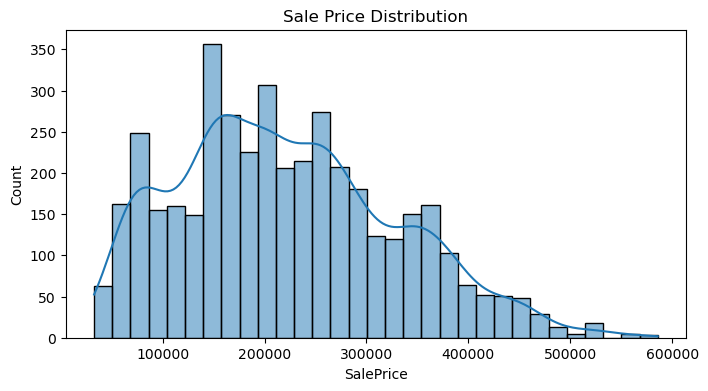

In [40]:
plt.figure(figsize=(8, 4))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Sale Price Distribution')

Berdasarkan grafik distribusi harga jual apartemen di Kota Daegu, dapat dilihat bahwa grafik tersebut sedikit positively skewed atau right-skewed distribution, artinya ada beberapa harga yang sangat tinggi atau outlier, tetapi sebagian besar harga berkumpul di rentang harga yang lebih rendah. Grafik ini memperlihatkan bahwa sebagian besar harga apartemen berada di rentang 150.000 hingga 300.000 Won, tetapi terdapat beberapa properti dengan harga yang jauh lebih tinggi, seperti di atas 500.000 Won, meskipun dalam jumlah yang tidak banyak.

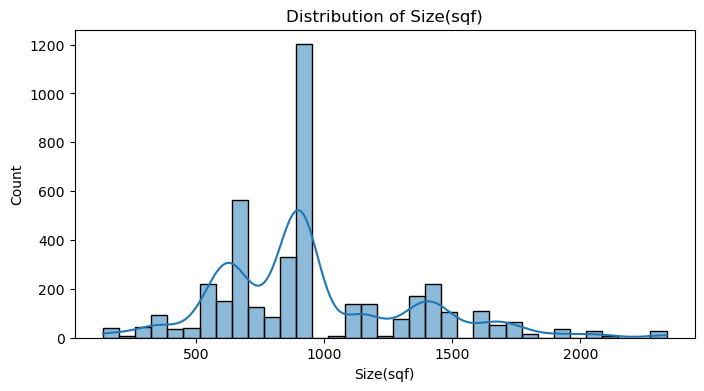

In [127]:
features = ['Size(sqf)']

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

Pada kolom atau fiture Size(sqf), dapat dilihat bahwa kebanyakan apartemen yang terdata memiliki ukuran 500-1000 sqf. 

In [6]:
print(f"\nJumlah tiap tipe apartemen:\n{df['HallwayType'].value_counts()}")


Jumlah tiap tipe apartemen:
terraced    2528
mixed       1131
corridor     464
Name: HallwayType, dtype: int64


Berdasarkan data di atas, dapat diketahui bahwa tipe apartemen terraced adalah tipe yang paling banyak dengan jumlah 2528 apartemen, diikuti dengan mixed hallway sejumlah 1131 apartemen, dan yang paling sedikit adalah tipe corridor sejumlah 464 apartemen. Sedangkan untuk rata-rata harga jual dari masing-masing tipe apartemen dapat dilihat dari grafik di bawah ini. 

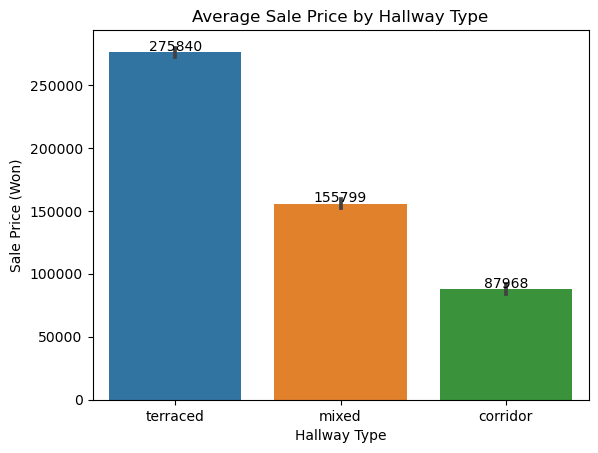

In [7]:
ax = sns.barplot(x='HallwayType', y='SalePrice', data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 1),
                textcoords='offset points')

plt.xlabel('Hallway Type')  
plt.ylabel('Sale Price (Won)')  
plt.title('Average Sale Price by Hallway Type')  

plt.show()

Berdasarkan grafik di atas, apartemen tipe terraced memiliki rata-rata harga jual tertinggi yaitu sebesar 275.840 Won, kemudian mixed hallway sebesar 155.799 won, dan corridor sebesar 87.968 Won. 

In [8]:
print(f"\nJumlah tiap tahun berdiri:\n{df['YearBuilt'].value_counts()}")


Jumlah tiap tahun berdiri:
2007    853
2005    502
2006    460
1993    451
1992    326
2013    322
2014    292
1986    273
2008    203
2009    171
2015     92
1997     67
1985     51
1978     49
2003      7
1980      4
Name: YearBuilt, dtype: int64


Berdasarkan tahun dibangunnya, kebanyakan apartemen yang terdata adalah apartemen yang dibangun pada tahun di atas tahun 2005, dimana tahun yang terbanyak adalah tahun 2007, 2005, dan 2006. 

C:\Users\Budi Ismail\AppData\Local\Temp\ipykernel_39156\1949494192.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='YearBuilt', y='SalePrice', data=df, ci=None)


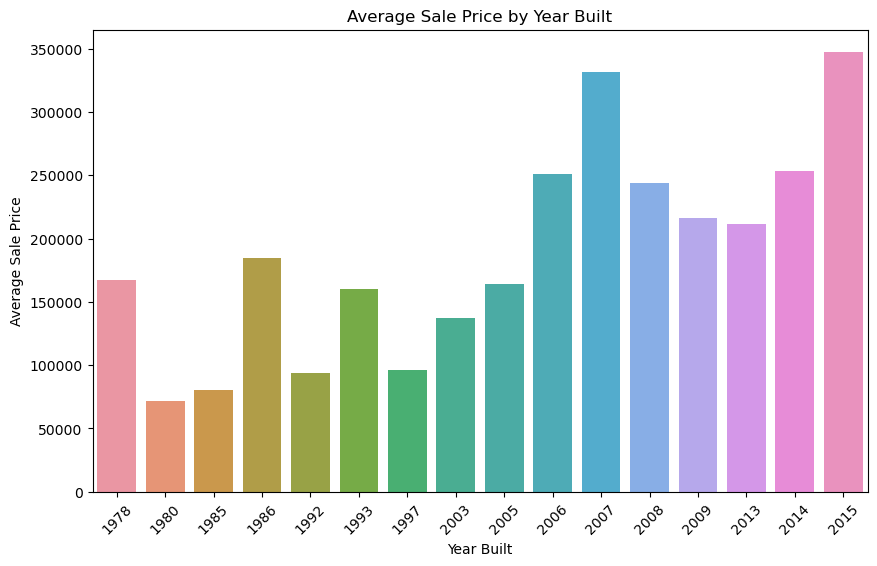

C:\Users\Budi Ismail\AppData\Local\Temp\ipykernel_39156\1949494192.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Size_Category', y='SalePrice', data=df, ci=None)


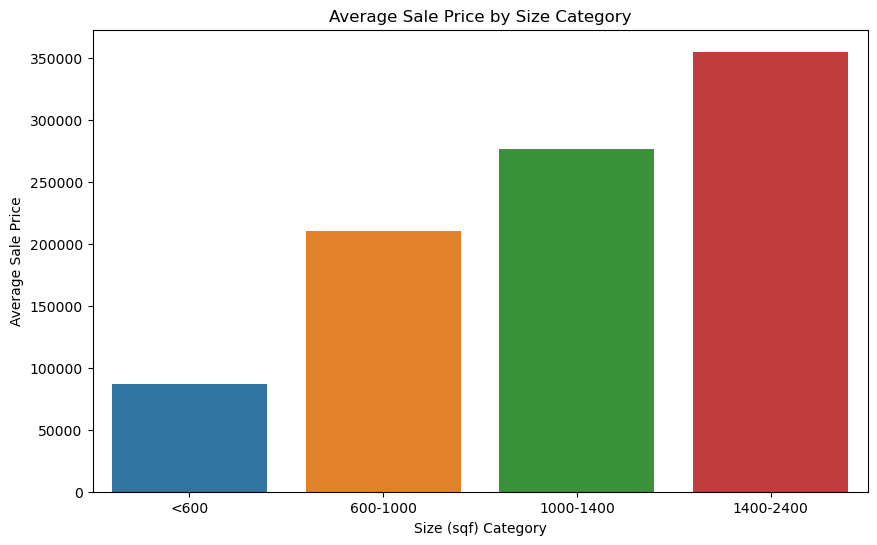

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='YearBuilt', y='SalePrice', data=df, ci=None)
plt.title('Average Sale Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45)
plt.show()

df['Size_Category'] = pd.cut(df['Size(sqf)'], bins=[0, 600, 1000, 1400, 2000], labels=['<600', '600-1000', '1000-1400', '1400-2400'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Size_Category', y='SalePrice', data=df, ci=None)
plt.title('Average Sale Price by Size Category')
plt.xlabel('Size (sqf) Category')
plt.ylabel('Average Sale Price')
plt.show()

Berdasarkan tahun dibangunnya, rata-rata harga jual tertinggi adalah apartemen yang dibangun pada tahun 2007 dan 2015, sedangkan yang terendah adalah apartemen yang dibangun pada 1980. Di sisi lain, berdasarkan ukuran apartemen (Size), dapat dilihat bahwa semakin besar ukuran apartemennya, rata-rata harga jual juga semakin meningkat. 

### 3. Data Preprocessing

Pada tahap preprocessing, akan dilakukan pembersihan data atau data cleaning sehingga dapat mempermudah dalam proses analisis. Hal-hal yang dapat dilakukan antara lain: 
1. Mengecek adanya missing value atau tidak. Jika terdapat missing value, dapat dilakukan beberapa hal untuk meng-handling missing value, seperti mengimputkan data dan menghapus data. 
2. Mengecek apakah terdapat data yang terduplikasi. Jika terdapat data yang terduplikasi, dapat dilakukan penghapusan data yang mengalami duplikasi. 
3. Mengecek korelasi dari variabel explanatory dengan variabel response.
4. Pengecekan adanya outliers pada data. 

Pada tahap ini, akan digunakan dataframe hasil salinan dari dataframe yang digunakan. 
 

In [3]:
df_model = df.copy()

In [4]:
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,HallwayType,object,0,0.0,3,"[mixed, terraced]"
1,TimeToSubway,object,0,0.0,5,"[5min~10min, 0-5min]"
2,SubwayStation,object,0,0.0,8,"[Daegu, Myung-duk]"
3,N_FacilitiesNearBy(ETC),float64,0,0.0,4,"[2.0, 1.0]"
4,N_FacilitiesNearBy(PublicOffice),float64,0,0.0,8,"[4.0, 6.0]"
5,N_SchoolNearBy(University),float64,0,0.0,6,"[3.0, 5.0]"
6,N_Parkinglot(Basement),float64,0,0.0,20,"[930.0, 605.0]"
7,YearBuilt,int64,0,0.0,16,"[2005, 1978]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[4, 10]"
9,Size(sqf),int64,0,0.0,89,"[1252, 1060]"


In [5]:
df_model.isna().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

Berdasarkan hasil pengecekan data yang kosong atau missing value, dapat dilihat bahwa tidak terdapat kolom yang memiliki data kosong atau missing value. Selanjutnya, dilakukan pengecekan apakah terdapat data yang terduplikasi. 

In [6]:
df_model.duplicated().sum()

1422

In [7]:
df_model.duplicated().sum()/df_model.shape[0]*100

34.48944943002668

Berdasarkan hasil pengecekan data duplikasi, dapat dilihat bahwa terdapat sebanyak 1422 row data atau sebanyak 34.5% data yang terduplikasi. Oleh karenya, dilakukan penghapusan baris data yang terduplikasi. 

In [8]:
df_model = df_model.drop_duplicates()

In [9]:
df_model.duplicated().sum()

0

In [10]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2701 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       2701 non-null   object 
 1   TimeToSubway                      2701 non-null   object 
 2   SubwayStation                     2701 non-null   object 
 3   N_FacilitiesNearBy(ETC)           2701 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  2701 non-null   float64
 5   N_SchoolNearBy(University)        2701 non-null   float64
 6   N_Parkinglot(Basement)            2701 non-null   float64
 7   YearBuilt                         2701 non-null   int64  
 8   N_FacilitiesInApt                 2701 non-null   int64  
 9   Size(sqf)                         2701 non-null   int64  
 10  SalePrice                         2701 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 253.2+ KB


Data yang semula berjumlah 4123, kini menjadi 2701 setelah dilakukan penghapusan sebanyak 1422 baris data yang terduplikasi. Selanjutnya, dilakukan pengecekan korelasi data dengan menggunakan heatmap untuk mengetahui variabel atau kolom manakah yang memiliki korelasi yang paling kuat dengan target atau kolom SalePrice. 

C:\Users\Budi Ismail\AppData\Local\Temp\ipykernel_33156\287055391.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


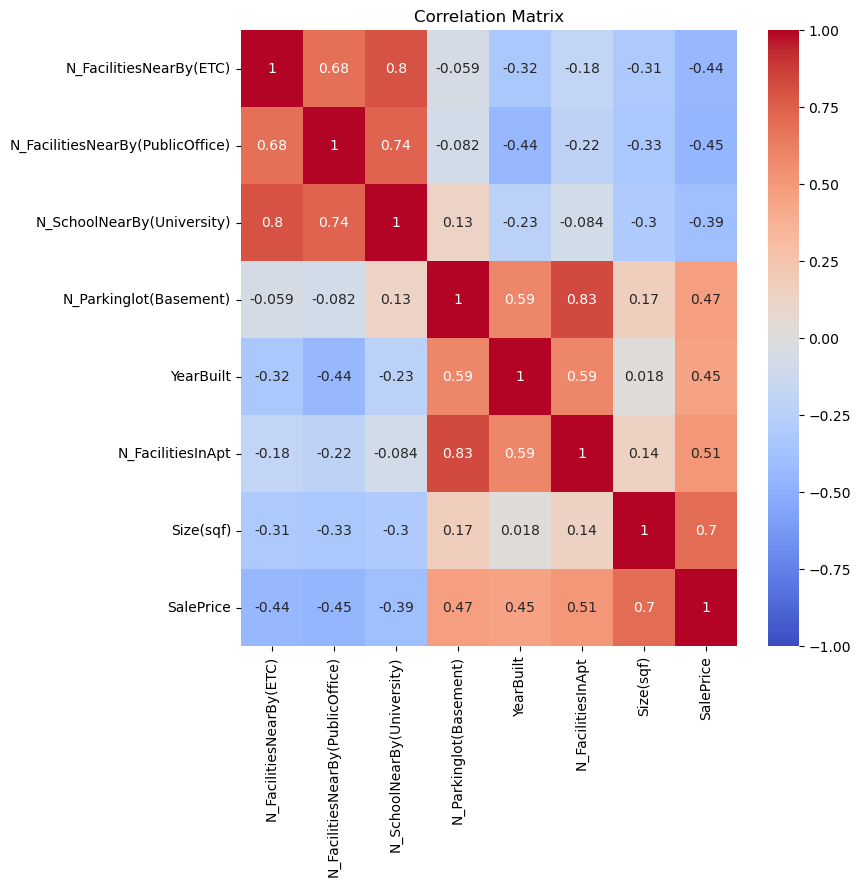

In [11]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Berdasarkan grafik tersebut, dapat dilihat bahwa fitur atau kolom yang memiliki korelasi paling tinggi dengan kolom SalePrice adalah kolom Size(sqf) dengan korelasi positif sebesar 0.7 yang berarti semakin besar ukuran apartemen, maka harga jual juga semakin tinggi. Kemudian diikuti dengan kolom N_FacilitiesInApt dengan korelasi positif sebesar 0.51, serta N_Parkinglot(Basement) dengan korelatif positif sebesar 0.47. Hal ini dapat diartikan harga jual akan cenderung lebih tinggi ketika apartemen tersebut memiliki jumlah tempat parkir dan fasilitas semakin banyak. 

Selanjutnya, dilakukan pengecekan apakah terdapat data outliers. 

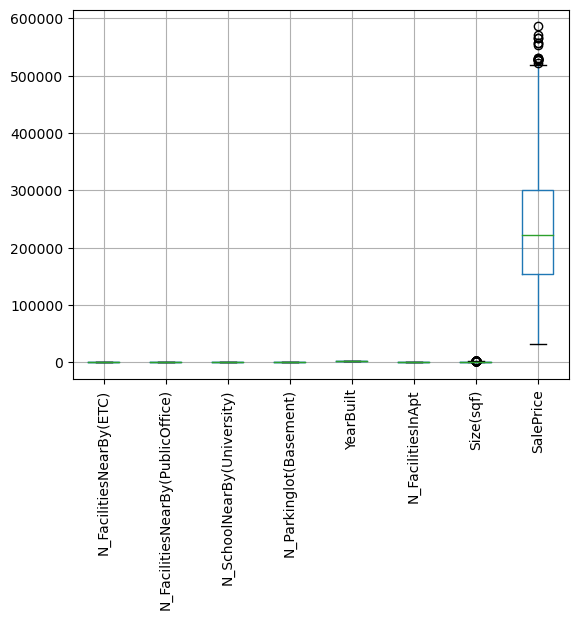

In [12]:
df_model.boxplot(rot=90);

Berdasarkan pengecekan data outliers, terdapat data yang mengandung outliers, yaitu outliers pada kolom atau fitur Size(sqf) dan SalePrice. 

**Outliers pada kolom Size(sqf)**

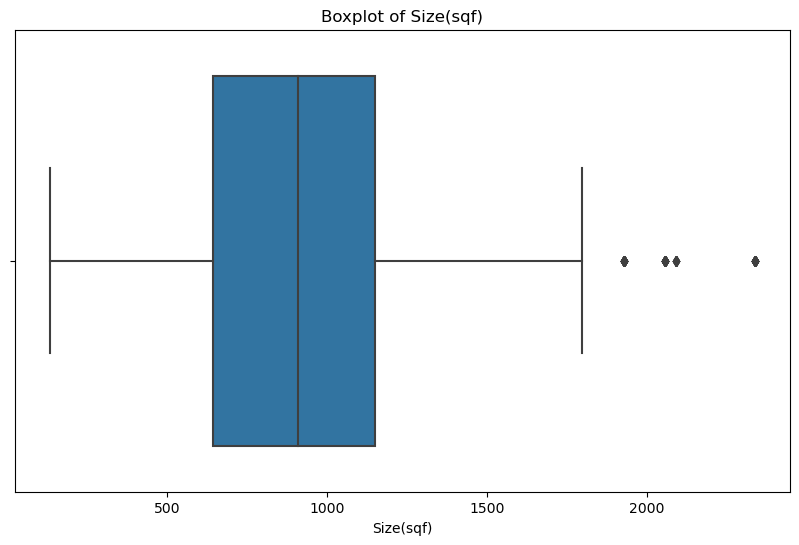

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Size(sqf)'])
plt.title('Boxplot of Size(sqf)')
plt.show()

In [14]:
Q1 = df['Size(sqf)'].quantile(0.25)
Q3 = df['Size(sqf)'].quantile(0.75)
IQR = Q3 - Q1
size_lower_bound = Q1 - 1.5 * IQR
size_upper_bound = Q3 + 1.5 * IQR

print(f"Upper bound = {size_upper_bound}")
print(f"Lower bound = {size_lower_bound}")

Upper bound = 1906.5
Lower bound = -113.5


In [15]:
outlier_up = len(df_model[df_model['Size(sqf)'] > size_upper_bound])
outlier_low = len(df_model[df_model['Size(sqf)'] < size_lower_bound])

print(f"Jumlah Outlier Atas = {outlier_up}")
print(f"Jumlah Outlier Bawah = {outlier_low}")

Jumlah Outlier Atas = 84
Jumlah Outlier Bawah = 0


**Outliers pada kolom SalePrice**

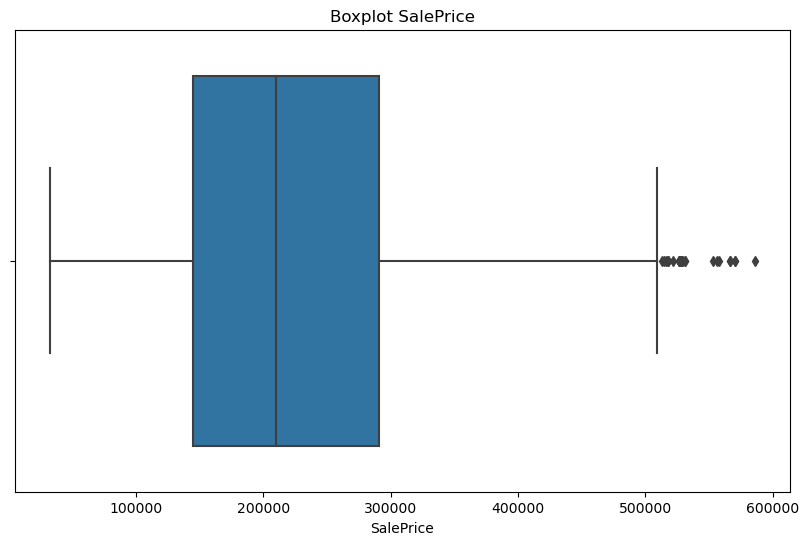

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['SalePrice'])
plt.title('Boxplot SalePrice')
plt.show()

In [17]:
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
price_lower_bound = Q1 - 1.5 * IQR
price_upper_bound = Q3 + 1.5 * IQR

print(f"Upper bound = {price_upper_bound}")
print(f"Lower bound = {price_lower_bound}")


Upper bound = 510747.0
Lower bound = -74845.0


In [18]:
outlier_up = len(df_model[df_model['SalePrice'] > price_upper_bound])
outlier_low = len(df_model[df_model['SalePrice'] < price_lower_bound])

print(f"Jumlah Outlier Atas = {outlier_up}")
print(f"Jumlah Outlier Bawah = {outlier_low}")

Jumlah Outlier Atas = 22
Jumlah Outlier Bawah = 0


Pada kolom Size(sqf) terdapat sebanyak 84 data outliers sedangkan pada kolom SalePrice terdapat 22 data outliers. 

In [19]:
df_model = df_model[(df_model['Size(sqf)'] >= size_lower_bound) & (df_model['Size(sqf)'] <= size_upper_bound)]
df_model = df_model[(df_model['SalePrice'] >= price_lower_bound) & (df_model['SalePrice'] <= price_upper_bound)]

In [20]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2607 entries, 0 to 4121
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       2607 non-null   object 
 1   TimeToSubway                      2607 non-null   object 
 2   SubwayStation                     2607 non-null   object 
 3   N_FacilitiesNearBy(ETC)           2607 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  2607 non-null   float64
 5   N_SchoolNearBy(University)        2607 non-null   float64
 6   N_Parkinglot(Basement)            2607 non-null   float64
 7   YearBuilt                         2607 non-null   int64  
 8   N_FacilitiesInApt                 2607 non-null   int64  
 9   Size(sqf)                         2607 non-null   int64  
 10  SalePrice                         2607 non-null   int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 244.4+ KB


Dari total 2701 data, sebanyak 94 row data memiliki data outliers pada fitur Size(sqf) dan SalePrice. Data outliers ini mempengaruhi model dalam menangkap pola data. Oleh karenanya, data outliers tidak digunakan dalam pemodelan. 


Hingga penanganan outliers, data yang tersisa dalam dataset dan akan digunakan dalam pembuatan model adalah sebanyak 2607 data dari yang semula berjumlah 4123 data. Dengan kata lain, sebanyak kurang lebih 36.77% data sudah dihilangkan dari dataset awal. 

### 4. Modeling

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

**Data Encoding**

Data encoding dilakukan kepada kolom atau fitur yang bersifat kategorikal, yaitu pada kolom HallwayType, TimeToSubway, dan SubwayStation. Data encoding akan mengubah kolom kategorikal menjadi bentuk numerikal sehingga fitur-fitur yang terdapat dataset dapat digunakan secara keseluruhan.

In [22]:
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['HallwayType', 'TimeToSubway', 'SubwayStation'])
], remainder='passthrough')

Selanjutnya, dilakukan data spliting untuk memisahkan variabel explanatory (variabel independen) dan variabel response (variabel dependen atau target) yaitu SalePrice. 

In [23]:
X = df_model.drop(['SalePrice'], axis=1)
y = df_model['SalePrice']

Selanjutnya, dilakukan pemisahan data training dan testing. Proporsi yang digunakan untuk kedua data ini adalah 80% untuk data training dan 20% untuk data testing atau sebesar 80:20. 

In [24]:
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.2,
    random_state=1)

Digunakan dua model regresi, yaitu linear regression dan random forest. Pada tahap ini dilakukan pendefinisian model yang akan digunakan serta melakukan data scalling. Algoritma yang paling baik nantinya akan dicari berdasarkan metrik evaluasi, dimana metrik yang digunakan adalah RMSE dan MAPE. 

In [25]:
lr = LinearRegression()
rf = RandomForestRegressor(random_state=1)

log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)

scaler = StandardScaler()

models = [log_lr, log_rf]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-53113.09846934 -51252.1021596  -50510.08591659 -56148.94085654
 -49198.2445767 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.22312898 -0.21230294 -0.20266864 -0.21397789 -0.21010298] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-45061.40828007 -46727.78612163 -44660.22110201 -46531.08704965
 -43277.71288739] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=RandomForestRegressor(random_state=1))
[-0.18465923 -0.19802562 -0.18641975 -0.17872426 -0.18141708] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=RandomForestRegressor(random_state=1))


In [26]:
pd.DataFrame({
    'Model': ['Linear Regression', 'RandomForest Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAPE,Std_MAPE
0,Linear Regression,-52044.494396,2411.299578,-0.212436,0.006597
1,RandomForest Regressor,-45251.643088,1272.662154,-0.185849,0.006640


Berdasarkan data tersebut, terdapat perbedaan nilai RMSE dan MAPE dari kedua model. Baik berdasar RMSE dan MAPE, random forest memiliki performa yang lebih baik dibandingkan linear regression. Selanjutnya, dilakukan prediksi dengan menggunakan data test. 

In [27]:
models = {
    'Linear Regression' : LinearRegression(),
    'Random Forest' : RandomForestRegressor(random_state=1),
}

score_rmse = []
score_mape = []

for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAPE
Linear Regression,48733.631098,0.206908
Random Forest,43857.378024,0.181646


Dari hasil prediksi dengan menggunakan data test, dapat dilihat bahwa random forest masih memiliki performa yang lebih baik dibandingkan dengan linear regression, dimana nilai RMSE dan MAPE dari prediksi dengan random forest bernilai lebih rendah dibandingkan linear regression.  

**Hyperparameter Tuning**

Setelah membandingkan 2 model sebelumnya, diketahui dengan dataset yang digunakan, model Random Forest memiliki performa yang lebih baik daripada Linear Regression. Oleh karenanya, untuk model regresi selanjutnya yang digunakan adalah model Random Forest. 

In [28]:
bootstrap = [True, False]

max_depth = list(np.arange(1, 12))

max_features = list(np.arange(1, 5))

min_samples_split = list(np.arange(2, 6))

min_samples_leaf = list(np.arange(1, 5, 2))

n_estimators = list(np.arange(100,301,100))

hyperparam_space_rf = {
    'model__bootstrap' : bootstrap,
    'model__max_depth': max_depth,            
    'model__max_features': max_features,          
    'model__min_samples_split': min_samples_split,    
    'model__min_samples_leaf' : min_samples_leaf,
    'model__n_estimators' : n_estimators     
}

In [29]:
rf = RandomForestRegressor(random_state=0)

rf_pipeline = Pipeline([
    ('preprocess', transformer),
    ('scaler', scaler),
    ('model', rf)
])

grid_rf = GridSearchCV(estimator = rf_pipeline, 
                           param_grid = hyperparam_space_rf, 
                           cv = 5, 
                           n_jobs = -1, 
                           scoring = 'neg_root_mean_squared_error', 
                           verbose = 2
                           )

In [30]:
grid_rf.fit(X_train, y_train)

Fitting 5 folds for each of 2112 candidates, totalling 10560 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('One '
                                                                         'Hot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['HallwayType',
                                                                          'TimeToSubway',
                                                                          'SubwayStation'])])),
                                       ('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestRegressor(random_state=0))]),
             n_jobs=-1,
             param_grid={'model__bootstrap': [True, False],
                         'model__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                              11],
                         'model__max_features': [1, 2, 3, 4],
                         'model__min_samples_leaf': [1, 3],
                         'model__min_samples_split': [2, 3, 4, 5],
                         'model__n_estimators': [100, 200, 300]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [31]:
print('Random Forest Regressor')
print('Best_score:', grid_rf.best_score_)
print('Best_params:', grid_rf.best_params_)

Random Forest Regressor
Best_score: -45101.162750763426
Best_params: {'model__bootstrap': True, 'model__max_depth': 10, 'model__max_features': 3, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}


Setelah mendapatkan model dan hyperparameter terbaik untuk random forest, dilakukan prediksi dengan menggunakan data testing.  

In [32]:
model = {'Random Forest ':RandomForestRegressor()}

rf_tuning = grid_rf.best_estimator_

rf_tuning.fit(X_train, y_train)

y_pred_rf_tuning = grid_rf.predict(X_test)

rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)

score_after_tuning_rf = pd.DataFrame({'RMSE': rmse_rf_tuning, 'MAPE': mape_rf_tuning}, index=model.keys())
score_after_tuning_rf

,RMSE,MAPE
Random Forest Regressor,43681.8464,0.180723


Perbedaan antara nilai RMSE dan MAPE sebelum dan setelah dilakukannya hyperparameter tuning dapat dilihat sebagai berikut. 

In [33]:
pd.DataFrame(score_before_tuning.loc['Random Forest']).T

,RMSE,MAPE
Random Forest,43857.378024,0.181646


In [34]:
score_after_tuning_rf

,RMSE,MAPE
Random Forest Regressor,43681.8464,0.180723


Setelah dilakukan hyperparameter tuning untuk random forest, terdapat penurunan walaupun tidak secara signifikan untuk nilai RMSE dan MAPE. Nilai MAPE yang diperoleh dari hasil prediksi model regresi yang digunakan adalah sekitar 18%. Nilai ini termasuk kategori 'good forecasting' menurut Lewis (1982).   

| **MAPE%** | **Tingkat Akurasi** |
| --- | --- |
| <10% | Sangat Baik (Excellent) | 
| 10%~19% | Baik (Good) | 
| 20%~49% | Wajar (Reasonable) |
| >50% | Tidak Akurat (Inaccurate) |

Sumber : Lewis, C. (1982). Industrial and Business Forecasting Methods. London: Butterworth Scientific.

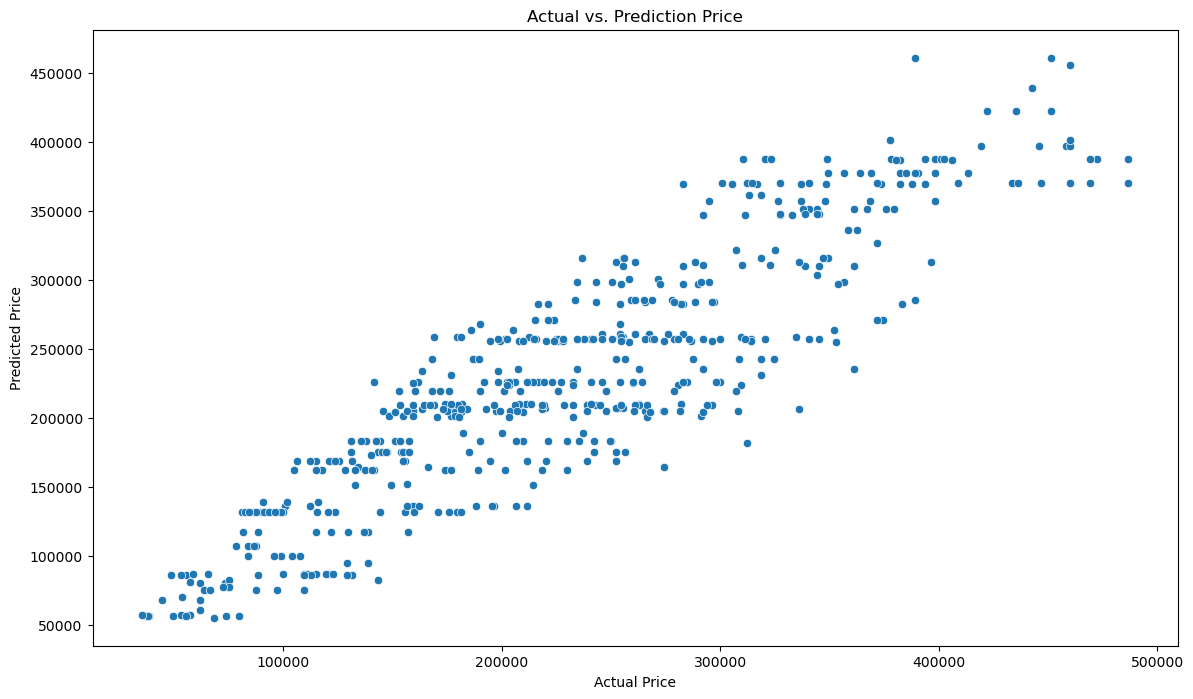

In [35]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_rf_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

Berdasarkan scatter plot tersebut, sebagian besar titik sudah mengikuti pola diagonal, tetapi ada beberapa yang tersebar di luar pola tersebut. Titik-titik yang menyebar tersebut menunjukkan terdapat prediksi harga jual yang tidak sesuai. Dapat dikatakan secara umum, pola terlihat cukup baik, namun ada ruang untuk perbaikan untuk model terutama pada outliers.

**Feature importances**

Feature importances digunakan untuk mengecek fitur atau kolom apa saja yang mempengaruhi target, yaitu SalePrice. 

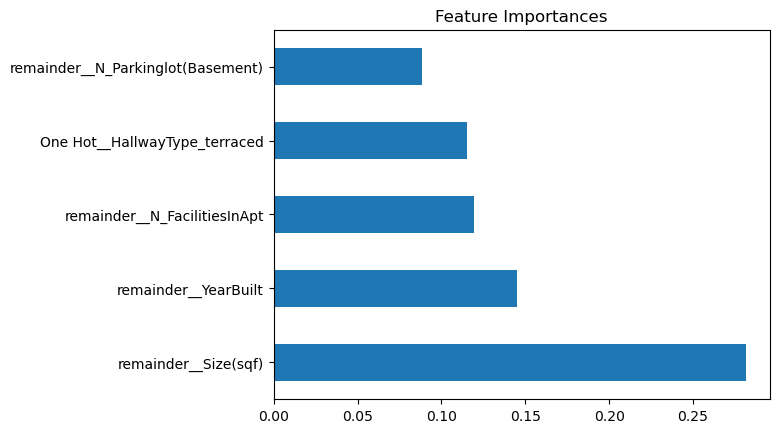

In [36]:
feature_imp = pd.Series(rf_tuning['model'].feature_importances_, transformer.get_feature_names_out()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

### 5. Conclusion and Recommendation

**Conclusion**
Berdasarkan modeling yang dilakukan, terdapat beberapa kesimpulan, yaitu: 
1. Fitur yang memiliki pengaruh terhadap SalePrice di antaranya adalah Size(sqf), N_FacilitiesInApt, N_Parkinglot(Basement), YearBuilt, dan HallwayType. Selain itu, Size(sqf) merupakan fitur yang paling berpengaruh terhadap SalePrice. 
    - Size(sqf) yang lebih besar cenderung memiliki harga jual yang tinggi pula. 
    - YearBuilt atau tahun dibangunnya apartemen juga mempengaruhi harga jual, dimana bangunan yang lebih baru mungkin lebih disukai. 
    - HallwayType atau tipe apartemen juga mempengaruhi harga jual dimana calon pembeli mungkin lebih menyukai salah satu tipe yang ada hingga dapat mempengaruhi harga jual apartemen. 
    - Selain itu fasilitas yang ditawarkan dari apartemen juga mempengaruhi harga jual, dimana semakin banyak fasilitas internal yang ditawarkan cenderung memiliki harga jual yang tinggi pula. 
2. Dilihat dari metrik evalusi yang digunakan, yaitu RMSE dan MAPE, model dapat memprediksi harga jual dengan cukup baik secara umum. Hasil nilai MAPE yang diperoleh setelah dilakukan hyperparameter tuning adalah sebesar 18%. Hal ini dapat diartikan sebagai secara rata-rata, prediksi harga jual dari model dapat melenceng dari harga jual sebenarnya kurang-lebih sebesar 18%. Model masih memiliki ruang untuk diperbaiki sehingga dapat memberikan hasil prediksi yang lebih baik dan lebih presisi.  

**Recommendation**
1. Bagi stakeholder ataupun pemilik apartemen yang akal menjual apartemennya, mungkin dapat lebih mempertimbangkan ukuran dari apartemen, tipe apartemen, fasilitas internal apartemen, serta kapan apartemen dibangun dalam menentukan harga jual. 
2. Untuk meningkatkan performa pemodelan, dapat dilakukan beberapa hal seperti: 
    - Treatment outliers dengan teknik lain selain penghapusan, seperti menggunakan robust models. Penghapusan outliers dapat mendapatkan model yang lebih sesuai dengan data training dan testing yang digunakan karena data lebih stabil, tetapi memungkinkan pula membuat model menjadi kurang adaptif jika terdapat data baru yang berada di luar upper ataupun lower bound. 
    - Dapat mengganti beberapa parameter lain ke jumlah yang lebih besar pada hyperparameter tuning. Hal ini mungkin akan membuat proses lebih lama karena model akan semakin kompleks namun memungkinkan juga mendapatkan hasil prediksi yang lebih baik. 
    - Dapat mencoba model lain sebagai benchmark model selain yang digunakan pada proyek ini seperti penggunaan model regresi yang lebih kompleks seperti Gradient Boosting atau XGBoost.
    - Jika memungkinkan dilakukan penambahan fitur yang menjelaskan karakteristik dari masing-masing unit apartemen, seperti jumlah ruangan atau kamar tidur atau jarak ke pusat kota.  